Text(0.5, 0.98, 'plt.subplots()')

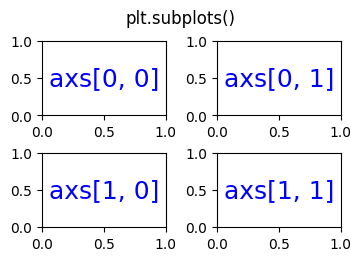

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5),
                        layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                            transform=axs[row, col].transAxes,
                            ha='center', va='center', fontsize=18,
                            color='blue')
fig.suptitle('plt.subplots()')

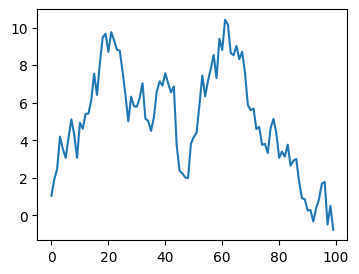

In [5]:
fig, ax = plt.subplots(figsize=(4, 3))
np.random.seed(19680801)
t = np.arange(100)
x = np.cumsum(np.random.randn(100))
lines = ax.plot(t, x)

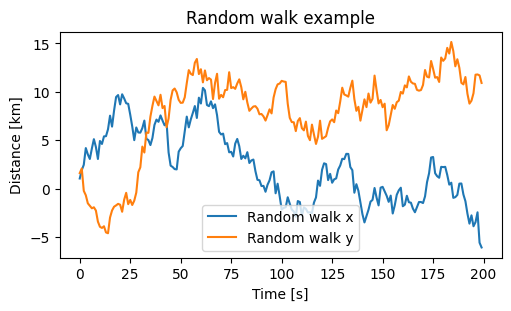

In [6]:
fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
y = np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x, label='Random walk x')
linesy = ax.plot(t, y, label='Random walk y')

ax.set_xlabel('Time [s]')
ax.set_ylabel('Distance [km]')
ax.set_title('Random walk example')
ax.legend()

(20.0, 180.0)

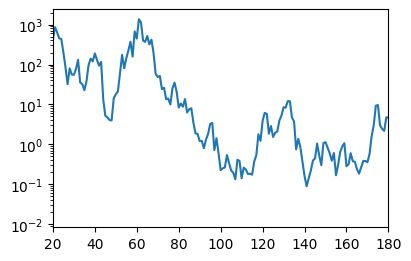

In [7]:
fig, ax = plt.subplots(figsize=(4, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = 2**np.cumsum(np.random.randn(200))
linesx = ax.plot(t, x)
ax.set_yscale('log')
ax.set_xlim([20, 180])

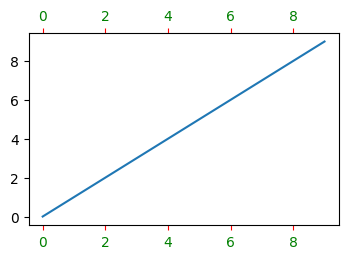

In [8]:
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(np.arange(10))
ax.tick_params(top=True, labeltop=True, color='red', axis='x',
               labelcolor='green')

Text(0.5, 1.0, 'aspect=3')

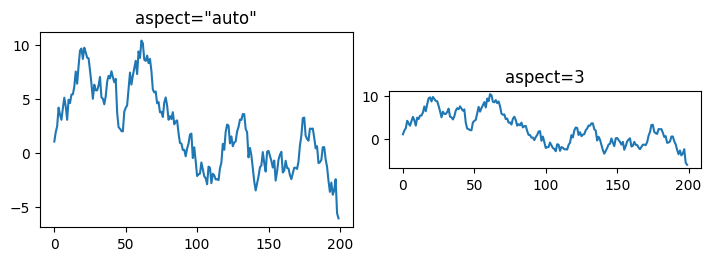

In [9]:
#Sometimes it is important to set the aspect ratio of a plot in data space, which we can do with set_aspect:
fig, axs = plt.subplots(ncols=2, figsize=(7, 2.5), layout='constrained')
np.random.seed(19680801)
t = np.arange(200)
x = np.cumsum(np.random.randn(200))
axs[0].plot(t, x)
axs[0].set_title('aspect="auto"')

axs[1].plot(t, x)
axs[1].set_aspect(3)
axs[1].set_title('aspect=3')

Text(0.5, 0.98, 'plt.subplots()')

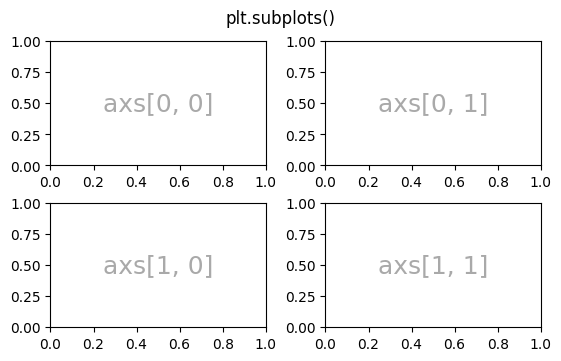

In [11]:
#We can create a basic 2-by-2 grid of Axes using subplots. It returns a Figure instance and an array of Axes objects. The Axes objects can be used to access methods to place artists on the Axes
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

In [12]:
#Annotation encapsulation
def annotate_axes(ax, text, fontsize=18):
    ax.text(0.5, 0.5, text, transform=ax.transAxes,
            ha="center", va="center", fontsize=fontsize, color="darkgrey")

Text(0.5, 0.98, 'plt.subplot_mosaic()')

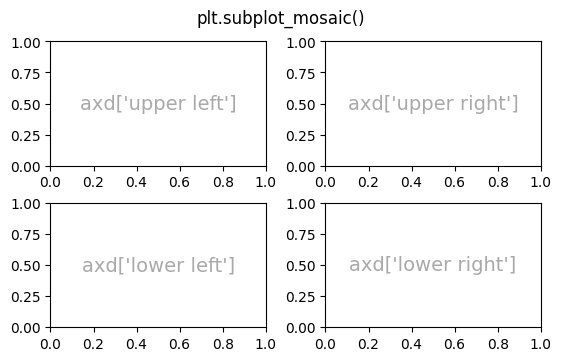

In [13]:
fig, axd = plt.subplot_mosaic([['upper left', 'upper right'],
                               ['lower left', 'lower right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'Fixed aspect Axes')

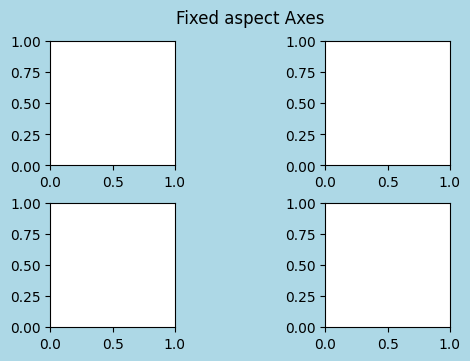

In [15]:
#Constrained layout
fig, axs = plt.subplots(2, 2, layout="constrained",
                        figsize=(5.5, 3.5), facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes')

Text(0.5, 0.98, 'Fixed aspect Axes: compressed')

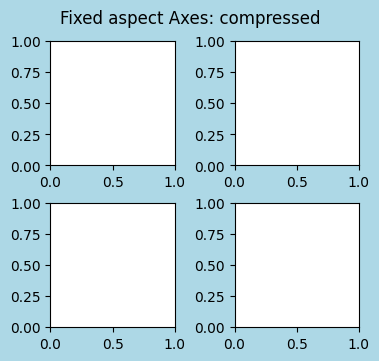

In [16]:
#Compressed layout
fig, axs = plt.subplots(2, 2, layout="compressed", figsize=(5.5, 3.5),
                        facecolor='lightblue')
for ax in axs.flat:
    ax.set_aspect(1)
fig.suptitle('Fixed aspect Axes: compressed')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

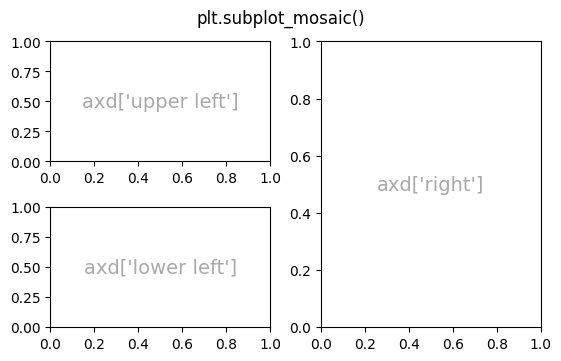

In [17]:
#Sometimes we want Axes to span rows or columns of the grid. 
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              figsize=(5.5, 3.5), layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')

Text(0.5, 0.98, 'plt.subplot_mosaic()')

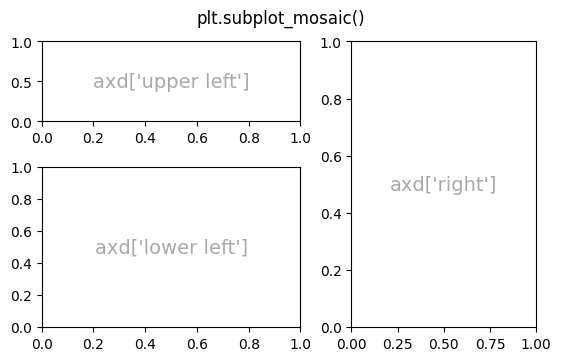

In [18]:
'''
Both subplots and subplot_mosaic allow the rows in the grid to be different heights, 
and the columns to be different widths using the gridspec_kw keyword argument.
'''
gs_kw = dict(width_ratios=[1.4, 1], height_ratios=[1, 2])
fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                               ['lower left', 'right']],
                              gridspec_kw=gs_kw, figsize=(5.5, 3.5),
                              layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]', fontsize=14)
fig.suptitle('plt.subplot_mosaic()')


Text(0.02, 0.5, 'ylabel for subfigs[1]')

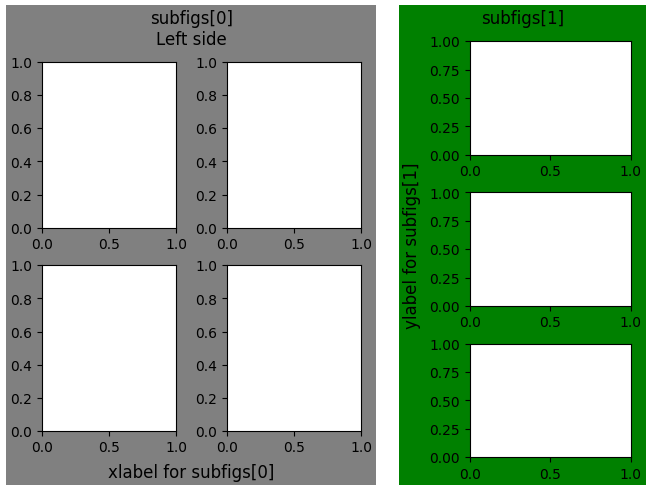

In [22]:
'''
Sometimes it is helpful to have two or more grids of Axes that may not need to be related to one another.
The most simple way to accomplish this is to use Figure.subfigures.
'''
fig = plt.figure(layout="constrained")
subfigs = fig.subfigures(1, 2, wspace=0.07, width_ratios=[1.5, 1.])
axs0 = subfigs[0].subplots(2, 2)
subfigs[0].set_facecolor('grey')
subfigs[0].suptitle('subfigs[0]\nLeft side')
subfigs[0].supxlabel('xlabel for subfigs[0]')

axs1 = subfigs[1].subplots(3, 1)
subfigs[1].set_facecolor('green')
subfigs[1].suptitle('subfigs[1]')
subfigs[1].supylabel('ylabel for subfigs[1]')

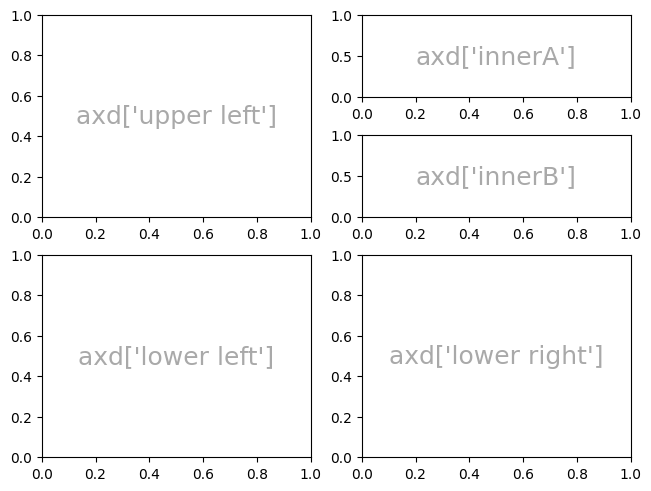

In [20]:
inner = [['innerA'],
         ['innerB']]
outer = [['upper left',  inner],
          ['lower left', 'lower right']]

fig, axd = plt.subplot_mosaic(outer, layout="constrained")
for k, ax in axd.items():
    annotate_axes(ax, f'axd[{k!r}]')

Text(0.5, 0.98, 'Manually added subplots using add_gridspec')

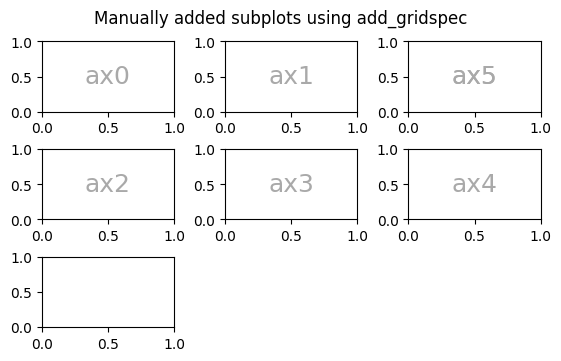

In [27]:
#We can accomplish a 2x2 grid in the same manner as plt.subplots(2, 2):
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(ncols=3, nrows=3)

ax0 = fig.add_subplot(spec[0, 0])
annotate_axes(ax0, 'ax0')

ax1 = fig.add_subplot(spec[0, 1])
annotate_axes(ax1, 'ax1')

ax2 = fig.add_subplot(spec[1, 0])
annotate_axes(ax2, 'ax2')

ax3 = fig.add_subplot(spec[1, 1])
annotate_axes(ax3, 'ax3')

ax4 = fig.add_subplot(spec[1, 2])
annotate_axes(ax4, 'ax4')

ax5 = fig.add_subplot(spec[0, 2])
annotate_axes(ax5, 'ax5')

ax6 = fig.add_subplot(spec[2, 0])
annotate_axes(ax5, 'ax5')

fig.suptitle('Manually added subplots using add_gridspec')

Text(0.5, 0.98, 'Manually added subplots, spanning a column')

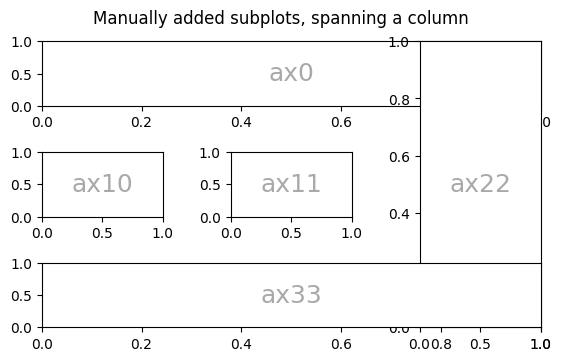

In [33]:
'''
We can index the spec array using NumPy slice syntax and the new Axes will span the slice.
This would be the same as fig, axd = plt.subplot_mosaic([['ax0', 'ax0'], ['ax1', 'ax2']], ...)
'''
fig = plt.figure(figsize=(5.5, 3.5), layout="constrained")
spec = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(spec[0, :])
annotate_axes(ax0, 'ax0')

ax10 = fig.add_subplot(spec[1, 0])
annotate_axes(ax10, 'ax10')

ax11 = fig.add_subplot(spec[1, 1])
annotate_axes(ax11, 'ax11')

ax22 = fig.add_subplot(spec[:, 2])
annotate_axes(ax22, 'ax22')

ax33 = fig.add_subplot(spec[2, :])
annotate_axes(ax33, 'ax33')

fig.suptitle('Manually added subplots, spanning a column')
